In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import time

1) Modify our "Mark and recapture" model to make it produce the average expectation for the number of animals. Do it by wrapping it in an outer loop, to run the model several times; remember the output (the estimation history) from each run of the model, average all estimation-histories across the runs. As you troubleshoot this, make the nsteps small, and auto-run the model only 2-3 times, just to make sure that it works. Once you are sure that your program works, you can again change the nsteps to several hundreds, and also make it rerun the model enough times to get a smooth-ish curve.

<IPython.core.display.Javascript object>


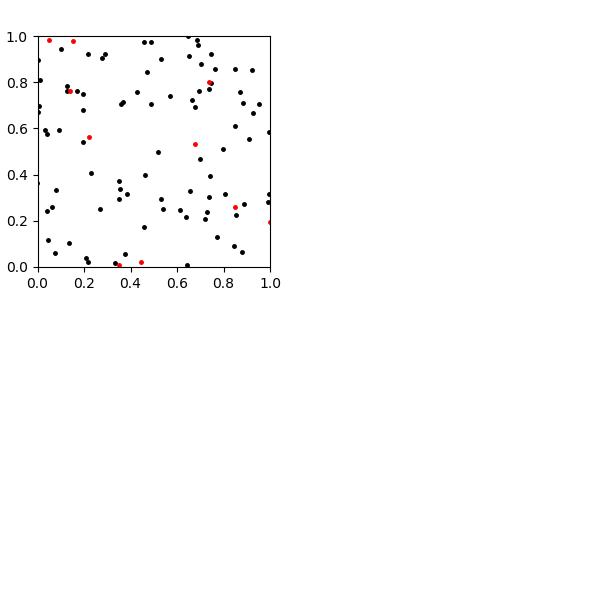

IndexError: too many indices for array

In [30]:
#MARK AND RECAPTURE AVERAGE ESTIMATIONS
%matplotlib notebook

n_animals = 100
n_steps = 100
vmin = 0.01
vmax = 0.05
trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)

# Capture
color = np.where(np.logical_and(x<trap_size , y<trap_size), 1, 0) # All captured are color1, all free ones are color0
n_marked = np.sum(color)

estimation = np.zeros(n_steps) # At every point in time we'll remember the estimation for N an ecologist could have made
estimation_history = np.zeros(shape=(n_animals,n_steps))

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for i in np.arange(3.0,4.5,0.1):
        for t in range(n_steps):
            x += vx #Moving elks around
            y += vy

            vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

            # Recapture
            n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
            n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color) # Condition1 AND cond2 AND color==1
            estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator

            ax.clear()
            plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
            plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.canvas.draw() # <--------------- The main command to make it move
            #time.sleep(0.5)
        
        estimation_history[:,i] = np.abs(x[:,1] - x[:,0])
    
        
    
plt.figure();
plt.plot(np.mean(estimation_history, axis=1), label=np.round(r,decimals=2));
plt.xlabel('Time');
plt.ylabel('Average number of turtles');

#I am not sure how to solve the problem of too many indicies in an array

2) Once you can make nice curves of expected estimations, use this tool to answer the following question: is it better to place your trap on the border of your area, or in the center? You can probably guess the answer, but please also use the model to analyze it properly. (Hint: generate two average curves, one for corner-placement, one for center-placement, find a way to plot them on one graph, compare the curves.)

* After you built a nice plot, add a Markdown cell below, and add some write-up (about a good honest paragraph). Explain how to interpret the plot. Answer the question. What trap placement is better; why; and what is the logic of it all.

* As you can guess, this question is actually meaningful, as IRL it's obviously easier to put traps on the border of a lake, forest, desert etc. So it would be nice to know whether it makes a difference (whether it is worth is hiking to the middle of a swamp), and if yes, then what is this difference.

<IPython.core.display.Javascript object>


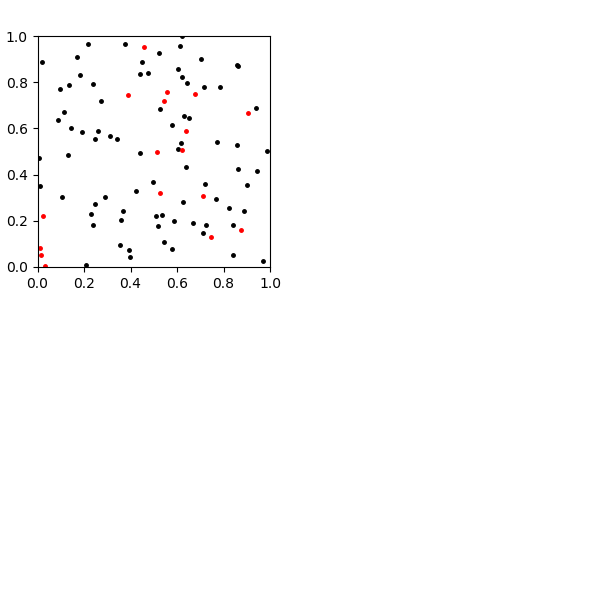

IndexError: too many indices for array

In [29]:
#MARK AND RECAPTURE DIFFERENT BORDER CONDITIONS 
%matplotlib notebook

n_animals = 100
n_steps = 100
vmin = 0.01
vmax = 0.05
trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)

# Capture
color = np.where(np.logical_and(x<trap_size , y<trap_size), 1, 0) # All captured are color1, all free ones are color0
n_marked = np.sum(color)

estimation = np.zeros(n_steps) # At every point in time we'll remember the estimation for N an ecologist could have made
estimation_history = np.zeros(shape=(n_animals,n_steps))

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for r in np.arange(3.0,4.5,0.1):
        for t in range(n_steps):
            x += vx #Moving elks around
            y += vy

            vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

            # Recapture
            n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
            n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color) # Condition1 AND cond2 AND color==1
            estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator

            ax.clear()
            plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
            plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.canvas.draw() # <--------------- The main command to make it move
            #time.sleep(0.5)
        
        estimation_history[:,nsteps] = np.abs(x[:,1] - x[:,0])
        
    
plt.figure();
plt.plot(np.mean(estimation_history, axis=1), label=np.round(r,decimals=2));
plt.xlabel('Time');
plt.ylabel('Average number of turtles');


# Summary

* 

3) After you are done with that, modify the model once again by introducing birth / death (aka immigration / emigration). Essentially, assume that while the true population size remains constant, some small share of individuals is always getting replaced with new individuals. Maybe they move to a different forest nearby, or maybe they are eaten by predators, and replaced by youngsters. Regardless of the mechanism, the consequence for us is that some share of marked individuals will be gradually lost.

* Find a way to introduce this mechanism to the model. Describe it in another paragraph of write-up. Find a reasonable rate of replacement. Justify it in your write-up. Run the model (you can place the trap in the corner again, or leave it in the middle - both options are fine; just mention in the write-up what your placement was).

* Look at the average estimation curves. Compare the curve without animal turnover to curves with turnover. Or better yet, compare 2-3 different rates of turnover. Give a recommendation to ecologists: when should they sample the population? Is it better to do early on? Or is it better to wait? Is there a sweet spot? Is there a way to identify it?